[![Binder](http://mybinder.org/badge_logo.svg)](http://mybinder.org/v2/gh/ML-COVID-19/data/master?filepath=CSO%2FLive-Register-Example.ipynb) | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ML-COVID-19/data/blob/master/CSO/Live-Register-Example.ipynb) 
----|-----

To run this notebook you can either 
- [open it in Binder](https://mybinder.org/v2/gh/ML-COVID-19/data/master?filepath=CSO%2FLive-Register-Example.ipynb) Run with `Cell->Run All`.
- [open it in Google Colab](https://colab.research.google.com/github/ML-COVID-19/data/blob/master/CSO/Live-Register-Example.ipynb) environment.  You need a Google account for this.  Run with `Runtime -> Run All`. You will be warned that the notebook was not authored by Google, click *run anyway*.
- [download the notebook file](https://som130.ucc.ie/ml-covid-19/data/-/raw/master/CSO/Live-Register-Example.ipynb?inline=false) and run on your own computer
- clone the [repository](https://som130.ucc.ie/ml-covid-19/data) using [git](https://git-scm.com/)


In [1]:
%%!
# install missing dependencies in Google Colab
if [ -x "$(command -v gcloud)" ]; then
  # This part only runs if the gcloud command is found.  We assume that this 
  # only happens on Google Colab
  wget https://raw.githubusercontent.com/ljleppan/py3-opendata/master/px_reader.py
  pip install pyjstat
fi 


[]

In [2]:
import pandas as pd
idx = pd.IndexSlice

import urllib.request
import px_reader

# Getting Data from CSO

Let's demonstrate, how data can be obtained from the CSO website.  We use [pandas](https://pandas.pydata.org/) for the backend.  

The [CSO website](https://www.cso.ie/en/databases/) seems to provide data in two different formats, `json` and `px`. For example, the file `LRM01` is available as [json](https://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/LRM01) or [PX File](https://statbank.cso.ie/px/pxeirestat/Database/eirestat/Live%20Register/LRM01.px). While JSON
is well known in Python, let's here use the `PX File` format. We use [`px_reader`](https://github.com/ljleppan/py3-opendata) which is open source and seems to work quite well


In [3]:
EXAMPLE_URL = "https://statbank.cso.ie/px/pxeirestat/Database/eirestat/Live%20Register/LRM01.px"

In [4]:
local_filename, headers = urllib.request.urlretrieve(EXAMPLE_URL)

pxo = px_reader.Px(local_filename)
pxo.stub, pxo.heading

(['Social Welfare Scheme'], ['Month', 'Sex', 'Age Group'])

In [5]:
df= pxo.pd_dataframe().astype(int)
df.head()

2006M01                                   \
                                  Both sexes                                    
                                    All ages Under 25 years 25 years and over   
All classes                           160139          31277            128862   
Jobseekers allowance applications      86123          22273             63850   
Jobseekers benefit claims              64114           8876             55238   
Other registrants                       9902            128              9774   

                                                                             \
                                      Male                                    
                                  All ages Under 25 years 25 years and over   
All classes                          95920          18530             77390   
Jobseekers allowance applications    62047          13314             48733   
Jobseekers benefit claims            31141           5174             25967   
Other registrants                     2732             42              2690   

                                                                             \
                                    Female                                    
                                  All ages Under 25 years 25 years and over   
All classes                          64219          12747             51472   
Jobseekers allowance applications    24076           8959             15117   
Jobseekers benefit claims            32973           3702             29271   
Other registrants                     7170             86              7084   

                                     2006M02  ...           2020M02  \
                                  Both sexes  ...            Female   
                                    All ages  ... 25 years and over   
All classes                           159617  ...             70987   
Jobseekers allowance applications      86273  ...             38213   
Jobseekers benefit claims              63690  ...             18139   
Other registrants                       9654  ...             14635   

                                     2020M03                                   \
                                  Both sexes                                    
                                    All ages Under 25 years 25 years and over   
All classes                           205209          23397            181812   
Jobseekers allowance applications     130296          19038            111258   
Jobseekers benefit claims              53992           4276             49716   
Other registrants                      20921             83             20838   

                                                                             \
                                      Male                                    
                                  All ages Under 25 years 25 years and over   
All classes                         113268          13074            100194   
Jobseekers allowance applications    81229          11187             70042   
Jobseekers benefit claims            25549           1848             23701   
Other registrants                     6490             39              6451   

                                                                             
                                    Female                                   
                                  All ages Under 25 years 25 years and over  
All classes                          91941          10323             81618  
Jobseekers allowance applications    49067           7851             41216  
Jobseekers benefit claims            28443           2428             26015  
Other registrants                    14431             44             14387  

[4 rows x 1539 columns]

In [6]:
dfn = df.stack().stack().T
dfn.index = pd.to_datetime(dfn.index,format="%YM%m")
dfn.tail()

All classes                                           \
           25 years and over                  All ages                  
                  Both sexes Female    Male Both sexes Female    Male   
2019-11-01            159192  69533   89659     177554  76895  100659   
2019-12-01            163527  71749   91778     181996  79118  102878   
2020-01-01            164164  71297   92867     183755  79150  104605   
2020-02-01            162884  70987   91897     182616  79020  103596   
2020-03-01            181812  81618  100194     205209  91941  113268   

                                        Jobseekers allowance applications  \
           Under 25 years                               25 years and over   
               Both sexes Female   Male                        Both sexes   
2019-11-01          18362   7362  11000                            105570   
2019-12-01          18469   7369  11100                            106619   
2020-01-01          19591   7853  11738                            106786   
2020-02-01          19732   8033  11699                            105616   
2020-03-01          23397  10323  13074                            111258   

            ... Jobseekers benefit claims Other registrants               \
            ...            Under 25 years 25 years and over                
            ...                      Male        Both sexes Female  Male   
2019-11-01  ...                      1165             21641  14947  6694   
2019-12-01  ...                      1181             21664  14974  6690   
2020-01-01  ...                      1412             21317  14719  6598   
2020-02-01  ...                      1411             21220  14635  6585   
2020-03-01  ...                      1848             20838  14387  6451   

                                                               
             All ages              Under 25 years              
           Both sexes Female  Male     Both sexes Female Male  
2019-11-01      21741  14997  6744            100     50   50  
2019-12-01      21759  15026  6733             95     52   43  
2020-01-01      21407  14764  6643             90     45   45  
2020-02-01      21304  14682  6622             84     47   37  
2020-03-01      20921  14431  6490             83     44   39  

[5 rows x 36 columns]

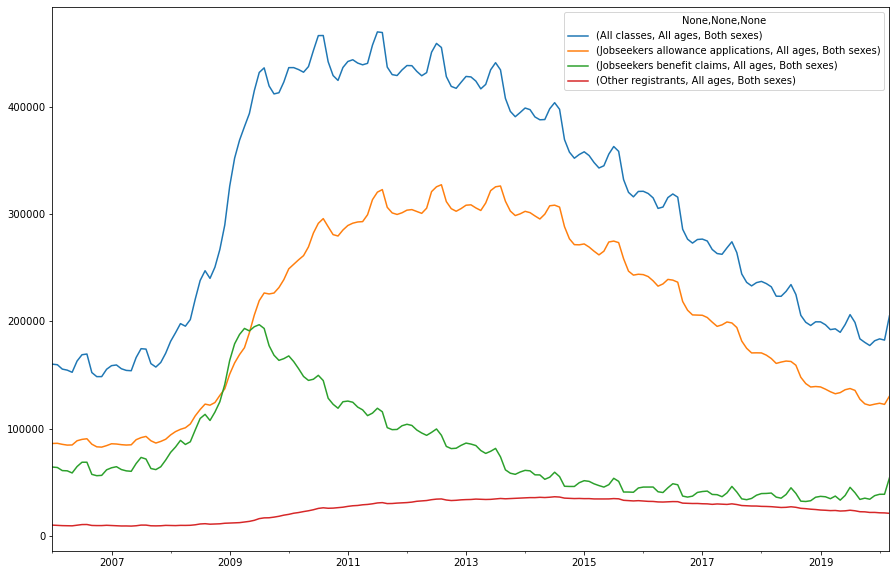

In [7]:
idx = pd.IndexSlice
dfn.loc[idx[:], idx[:,"All ages","Both sexes"] ].plot(figsize=(15,10))

In [8]:
dfn.columns

MultiIndex([(                      'All classes', '25 years and over', ...),
            (                      'All classes', '25 years and over', ...),
            (                      'All classes', '25 years and over', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',    'Under 25 years', ...),
            (                      'All classes',    'Under 25 years', ...),
            (                      'All classes',    'Under 25 years', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications',          'All ages', ...),

## Json file

just for comparison, here how to work with the JSON files, which are also provided through CSO.
According to [statbank.cso.ie](https://statbank.cso.ie/webserviceclient/), 
json files are published  in [*json-stat*](https://json-stat.org/format/) format. 
Note that [not all databases are published in `json`](https://statbank.cso.ie/webserviceclient/unavailableTables.aspx).  
The ones which *are* published can be obtained by going through the [Dataset Listing](https://statbank.cso.ie/webserviceclient/DatasetListing.aspx).  

For example, clicking at "Labour Market and Earnings" -> "Labour Market" -> "Live Register" gives us the [LRM01 Json file](https://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/LRM01). If we consider the URL for this file, it is of the form 
```
https://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/ + DATABASE
```

In order to access it in Python, 
we need to install a library [`pjstat`](https://pypi.org/project/pyjstat/) using 
```bash
> pip install --user pjstat
```

Here is an [example script](https://github.com/predicador37/pyjstat/blob/master/examples/example-2.0.py), which shows how to access CSO.ie data.  We adapt it for our case as follows:


In [9]:
from pyjstat import pyjstat


base_uri = 'https://statbank.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/'
DATABASE = "LRM01"
uri = base_uri + DATABASE
filename = DATABASE + ".json"

Note that in contrast to the example code, we use `https://statbank.cso.ie` instead of `http://www.cso.ie`.  The reason is that the CSO certificates are not properly configured for downloading automatically. 

In [10]:
dataset = pyjstat.Dataset.read(uri)
dataset.keys()

odict_keys(['dataset'])

Let's explore, what we have downloaded:

In [11]:
dataset["dataset"].keys()

dict_keys(['dimension', 'label', 'source', 'updated', 'value'])

The actual data is in `'value'`:

In [12]:
len(dataset["dataset"]["value"]),dataset["dataset"]["value"][:10]

(23004, [58670, 57939, 56880, 51373, 47739, 43839, 42394, 43740, 42504, 47300])

This means we have 23004 numbers in a flat array. Actually, there are some entries which are `None`, indicating the absence of data.  

All other entries in the `dataset` structure, only serve to provide context for the numbers appearing in `value`. 

In particular, `'label'`, `'source'` and  `'updated'` are straightforward strings:

In [13]:
dataset["dataset"]["label"],dataset["dataset"]["source"],dataset["dataset"]["updated"]

('Persons on Live Register by  Social Welfare Scheme, Age Group, Sex and Month',
 'Central Statistics Office, Ireland',
 '2020-04-20T01:15:01Z')

More interesting is `'dimension'`

In [14]:
dataset["dataset"]["dimension"].keys()

dict_keys(['Age Group', 'Sex', 'Social Welfare Scheme', 'Month', 'Statistic', 'id', 'size', 'role'])

Here `'id'` and `'size'` list the labels and sizes of the respective dimensions.  In this case, we have 5 dimensions (i.e. a rank 5 tensor).

In [15]:
dataset["dataset"]["dimension"]["id"]

['Age Group', 'Sex', 'Social Welfare Scheme', 'Month', 'Statistic']

In [16]:
dataset["dataset"]["dimension"]["size"]

[3, 3, 4, 639, 1]

We can check, that the product of those numbers agrees with the length of `value`:

In [17]:
import math
math.prod(dataset["dataset"]["dimension"]["size"])

23004

Then `'role'` tells us that the `'Month'` column has the role of `time`. 

In [18]:
dataset["dataset"]["dimension"]["role"]

{'time': ['Month'], 'metric': ['Statistic']}

Looking into one of the dimensions, for example `'Age Group'` gives some insight on the general structure:

In [19]:
dataset["dataset"]["dimension"]["Age Group"]

{'label': 'Age Group',
 'category': {'index': {'-': 0, '405': 1, '430': 2},
  'label': {'-': 'All ages',
   '405': 'Under 25 years',
   '430': '25 years and over'}}}

In [20]:
dataset["dataset"]["dimension"]["Social Welfare Scheme"]

{'label': 'Social Welfare Scheme',
 'category': {'index': {'AC': 0, 'JA': 1, 'JB': 2, 'OR': 3},
  'label': {'AC': 'All classes',
   'JA': 'Jobseekers allowance applications',
   'JB': 'Jobseekers benefit claims',
   'OR': 'Other registrants'}}}

In [21]:
dataset["dataset"]["dimension"]["Statistic"]

{'label': 'Statistic',
 'category': {'index': {'LRM01C1': 0},
  'label': {'LRM01C1': 'Persons on Live Register (Number)'},
  'unit': {'LRM01C1': {'base': 'Number'}}}}

We can also convert to a pandas dataframe, but it is not multi-indexed.

In [22]:
df = dataset.write('dataframe')
df

,Age Group,Sex,Social Welfare Scheme,Month,Statistic,value
0,All ages,Both sexes,All classes,1967M01,Persons on Live Register (Number),58670.0
1,All ages,Both sexes,All classes,1967M02,Persons on Live Register (Number),57939.0
2,All ages,Both sexes,All classes,1967M03,Persons on Live Register (Number),56880.0
3,All ages,Both sexes,All classes,1967M04,Persons on Live Register (Number),51373.0
4,All ages,Both sexes,All classes,1967M05,Persons on Live Register (Number),47739.0
...,...,...,...,...,...,...
22999,25 years and over,Female,Other registrants,2019M11,Persons on Live Register (Number),14947.0
23000,25 years and over,Female,Other registrants,2019M12,Persons on Live Register (Number),14974.0
23001,25 years and over,Female,Other registrants,2020M01,Persons on Live Register (Number),14719.0
23002,25 years and over,Female,Other registrants,2020M02,Persons on Live Register (Number),14635.0


We see that the order is the same, as previously in the `value` array.  In order to work more conveniently with this table in `pandas`, we can convert it into a multi-index table

In [23]:
df = df.drop(columns="Statistic")


In [24]:
df = df.pivot_table(index="Month",columns=["Social Welfare Scheme","Age Group","Sex"],
                    values="value")
df

Social Welfare Scheme       All classes                                \
Age Group             25 years and over                      All ages   
Sex                          Both sexes   Female      Male Both sexes   
Month                                                                   
1967M01                             0.0      0.0       0.0    58670.0   
1967M02                             0.0      0.0       0.0    57939.0   
1967M03                             0.0      0.0       0.0    56880.0   
1967M04                             0.0      0.0       0.0    51373.0   
1967M05                             0.0      0.0       0.0    47739.0   
...                                 ...      ...       ...        ...   
2019M11                        159192.0  69533.0   89659.0   177554.0   
2019M12                        163527.0  71749.0   91778.0   181996.0   
2020M01                        164164.0  71297.0   92867.0   183755.0   
2020M02                        162884.0  70987.0   91897.0   182616.0   
2020M03                        181812.0  81618.0  100194.0   205209.0   

Social Welfare Scheme                                                      \
Age Group                                Under 25 years                     
Sex                     Female      Male     Both sexes   Female     Male   
Month                                                                       
1967M01                10023.0   48647.0            0.0      0.0      0.0   
1967M02                10033.0   47906.0            0.0      0.0      0.0   
1967M03                10483.0   46397.0            0.0      0.0      0.0   
1967M04                 9461.0   41912.0            0.0      0.0      0.0   
1967M05                 8528.0   39211.0            0.0      0.0      0.0   
...                        ...       ...            ...      ...      ...   
2019M11                76895.0  100659.0        18362.0   7362.0  11000.0   
2019M12                79118.0  102878.0        18469.0   7369.0  11100.0   
2020M01                79150.0  104605.0        19591.0   7853.0  11738.0   
2020M02                79020.0  103596.0        19732.0   8033.0  11699.0   
2020M03                91941.0  113268.0        23397.0  10323.0  13074.0   

Social Welfare Scheme Jobseekers allowance applications  ...  \
Age Group                             25 years and over  ...   
Sex                                          Both sexes  ...   
Month                                                    ...   
1967M01                                             NaN  ...   
1967M02                                             NaN  ...   
1967M03                                             NaN  ...   
1967M04                                             NaN  ...   
1967M05                                             NaN  ...   
...                                                 ...  ...   
2019M11                                        105570.0  ...   
2019M12                                        106619.0  ...   
2020M01                                        106786.0  ...   
2020M02                                        105616.0  ...   
2020M03                                        111258.0  ...   

Social Welfare Scheme Jobseekers benefit claims Other registrants           \
Age Group                        Under 25 years 25 years and over            
Sex                                        Male        Both sexes   Female   
Month                                                                        
1967M01                                     NaN               NaN      NaN   
1967M02                                     NaN               NaN      NaN   
1967M03                                     NaN               NaN      NaN   
1967M04                                     NaN               NaN      NaN   
1967M05                                     NaN               NaN      NaN   
...                                         ...               ...      ...   
2019M11

Let's also convert the index into acceptable datetime format:

In [25]:
df.index = pd.to_datetime(df.index,format="%YM%m")
df

Social Welfare Scheme       All classes                                \
Age Group             25 years and over                      All ages   
Sex                          Both sexes   Female      Male Both sexes   
Month                                                                   
1967-01-01                          0.0      0.0       0.0    58670.0   
1967-02-01                          0.0      0.0       0.0    57939.0   
1967-03-01                          0.0      0.0       0.0    56880.0   
1967-04-01                          0.0      0.0       0.0    51373.0   
1967-05-01                          0.0      0.0       0.0    47739.0   
...                                 ...      ...       ...        ...   
2019-11-01                     159192.0  69533.0   89659.0   177554.0   
2019-12-01                     163527.0  71749.0   91778.0   181996.0   
2020-01-01                     164164.0  71297.0   92867.0   183755.0   
2020-02-01                     162884.0  70987.0   91897.0   182616.0   
2020-03-01                     181812.0  81618.0  100194.0   205209.0   

Social Welfare Scheme                                                      \
Age Group                                Under 25 years                     
Sex                     Female      Male     Both sexes   Female     Male   
Month                                                                       
1967-01-01             10023.0   48647.0            0.0      0.0      0.0   
1967-02-01             10033.0   47906.0            0.0      0.0      0.0   
1967-03-01             10483.0   46397.0            0.0      0.0      0.0   
1967-04-01              9461.0   41912.0            0.0      0.0      0.0   
1967-05-01              8528.0   39211.0            0.0      0.0      0.0   
...                        ...       ...            ...      ...      ...   
2019-11-01             76895.0  100659.0        18362.0   7362.0  11000.0   
2019-12-01             79118.0  102878.0        18469.0   7369.0  11100.0   
2020-01-01             79150.0  104605.0        19591.0   7853.0  11738.0   
2020-02-01             79020.0  103596.0        19732.0   8033.0  11699.0   
2020-03-01             91941.0  113268.0        23397.0  10323.0  13074.0   

Social Welfare Scheme Jobseekers allowance applications  ...  \
Age Group                             25 years and over  ...   
Sex                                          Both sexes  ...   
Month                                                    ...   
1967-01-01                                          NaN  ...   
1967-02-01                                          NaN  ...   
1967-03-01                                          NaN  ...   
1967-04-01                                          NaN  ...   
1967-05-01                                          NaN  ...   
...                                                 ...  ...   
2019-11-01                                     105570.0  ...   
2019-12-01                                     106619.0  ...   
2020-01-01                                     106786.0  ...   
2020-02-01                                     105616.0  ...   
2020-03-01                                     111258.0  ...   

Social Welfare Scheme Jobseekers benefit claims Other registrants           \
Age Group                        Under 25 years 25 years and over            
Sex                                        Male        Both sexes   Female   
Month                                                                        
1967-01-01                                  NaN               NaN      NaN   
1967-02-01                                  NaN               NaN      NaN   
1967-03-01                                  NaN               NaN      NaN   
1967-04-01                                  NaN               NaN      NaN   
1967-05-01                                  NaN               NaN      NaN   
...                                         ...               ...      ...   
2019-11

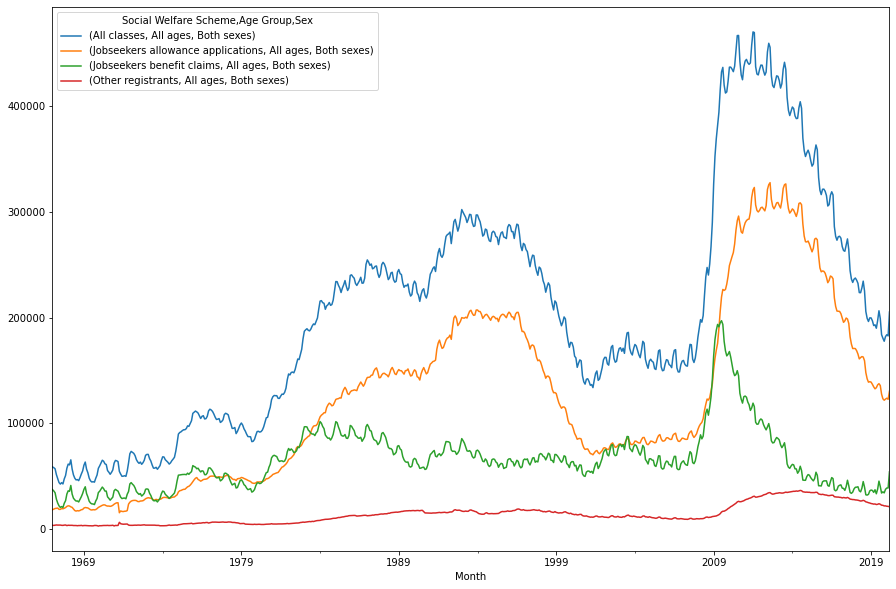

In [26]:
df.loc[:, idx[:,"All ages","Both sexes"] ].plot(figsize=(15,10))

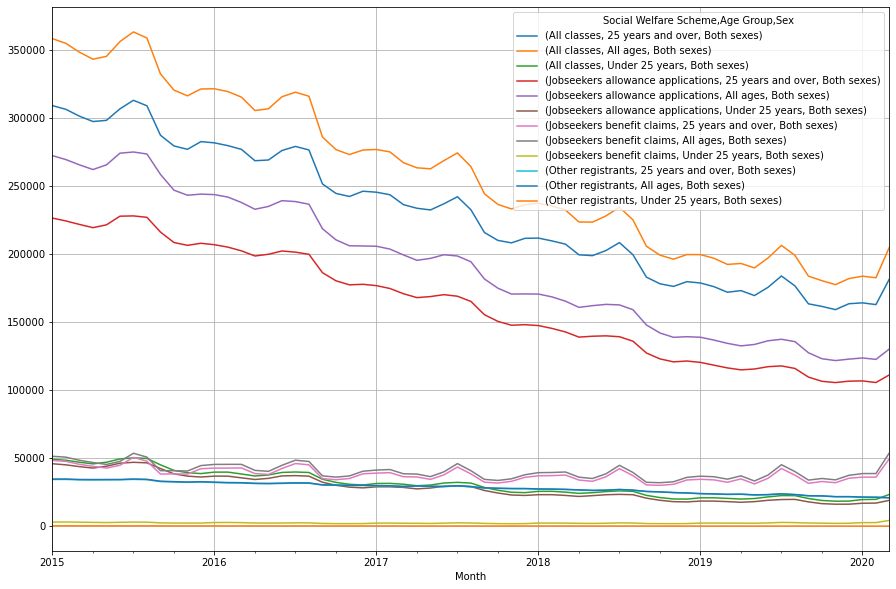

In [27]:
df.loc["2015":, idx[:,:,"Both sexes" ]].plot(figsize=(15,10),grid=True)